#  US Gap Analysis Project - WV Breeding Bird Atlas Data Comparison 
Nathan Tarr and Jessie Jordan

## Cover type associations in West Virginia
We investigated the agreement between WV Breeding Bird Atlas (2011-2015) and USGS Gap Analysis Project data on 

In [1]:
# Define a species ----------------------------------------------------------
species = 'Common Yellowthroat'

In [2]:
import pandas as pd
import repo_functions as fun
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 15)

# Load land cover crosswalk - slow loading for some reason
cross = pd.read_csv(fun.dataDir + "LandCover/land_cover_crosswalk.csv", header=0, dtype={'GAP_code': str}) 

In [3]:
# Perform crosswalk of detections from WV -> USGAP
master, GAP_linked, unmatched, gap_types, wv_types = fun.cross_to_GAP(species, cross)


System associations in the GAP model
                                                                   GAP_name
GAP_code                                                                   
1201                                                  Developed, Open Space
1201                                                  Developed, Open Space
1403                                                            Pasture/Hay
1403                                                            Pasture/Hay
4104                Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4104                Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4119                          Southern Appalachian Northern Hardwood Forest
4119                          Southern Appalachian Northern Hardwood Forest
4119                          Southern Appalachian Northern Hardwood Forest
4125                            Southern and Central Appalachian Oak Forest
4125                            Southern and Centr

In [4]:
# Show validated associations ------------------------------------------------
print("Validated associations")
df_valid = master[master['evaluation'] == 'valid']
print(df_valid[['GAP_code', 'GAP_name', 'detections']])

Validated associations
   GAP_code                                                           GAP_name  detections
6      1403                                                        Pasture/Hay         9.0
11     4119                      Southern Appalachian Northern Hardwood Forest        13.0
15     4202                                     Southern Piedmont Mesic Forest         2.0
34     8504                                                     Ruderal forest        42.0
36     9222  Central Interior and Appalachian Shrub-Herbaceous Wetland Systems         8.0


In [5]:
# Show supported additions ---------------------------------------------------
print("New GAP ecological system associations that are supported by WVBBA:")
df_add = master[master['evaluation'] == 'add_association']
print(df_add[['GAP_code', 'GAP_name', 'detections']])

New GAP ecological system associations that are supported by WVBBA:
  GAP_code                      GAP_name  detections
0        0                           NaN         2.0
7     2102            Open Water (Fresh)         4.0
8     3105  Undifferentiated Barren Land         9.0


In [6]:
# Show invalid WV codes entered ----------------------------------------------
print("Invalid habitat codes entered by WVBBA observers:")
print(unmatched)

Invalid habitat codes entered by WVBBA observers:
{'17': 31.0, '4a': 1.0, '8a': 1.0}


                      detections
Unusable                   304.0
Supported validation        74.0
Supported addition          15.0
Total detections           393.0


Text(0, 0.5, '')

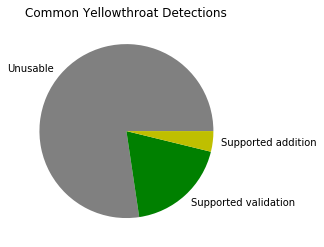

In [7]:
# Report and plot results for usable detections ------------------------------
usable_df = pd.DataFrame(index=["Unusable", "Supported validation", "Supported addition", "Total detections"], 
                         columns=["detections"])
usable_df.loc['Supported validation', 'detections'] = int(df_valid[['detections']].sum())
usable_df.loc['Supported addition', 'detections'] = int(df_add[['detections']].sum())
usable_df.loc['Total detections', 'detections'] = wv_types['detections'].sum()
usable_df.loc['Unusable', 'detections'] = int(wv_types['detections'].sum() - df_valid[['detections']].sum() - df_add[['detections']].sum())
usable_df = usable_df.fillna(0)
print(usable_df)
plt1 = usable_df.drop(['Total detections']).plot(y='detections', kind='pie',
                                                 legend=False, 
                                                 title = species + " Detections",
                                                 colors=['gray', 'g', 'y'])
plt1.set_ylabel("")

             GAP_types
Unvalidated         28
Validated            5
Additions            3


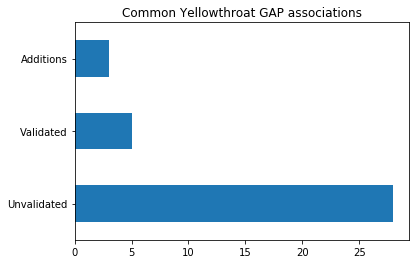

In [8]:
# Report and plot results for proportion of GAP systems validated ------------------------------
eval_df = pd.DataFrame(index=["Unvalidated", "Validated", "Additions"], columns=["GAP_types"])
eval_df.loc['Unvalidated', "GAP_types"] = len(gap_types) - len(df_valid)
eval_df.loc['Validated', "GAP_types"] = len(df_valid)
eval_df.loc['Additions', "GAP_types"] = len(df_add)
eval_df = eval_df.fillna(0)
print(eval_df)
plt2 = eval_df.plot(y='GAP_types', kind='barh', legend=False, title = species + " GAP associations")